<a href="https://colab.research.google.com/github/TheEPIC-saga/AIML-LABS-IIIT/blob/main/AIML_module2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
# Upload Module2_ProjectFiles.zip file here by running this cell
# Upload Module2_ProjectFiles.zip file here by running this cell

uploaded = files.upload()
loc_ = list(uploaded.keys())[0]
!unzip -q {loc_}

Saving INDIA_685.csv to INDIA_685.csv
Saving sequences.fasta to sequences.fasta
[INDIA_685.csv]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of INDIA_685.csv or
        INDIA_685.csv.zip, and cannot find INDIA_685.csv.ZIP, period.


In [3]:
!pip3 -q install biopython

import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.autonotebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.9 MB/s eta 0:00:00


/tmp/ipython-input-4048425673.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
data = pd.read_csv("INDIA_685.csv")
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,21/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [5]:
fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

counter = 0
for fasta in fasta_sequences:
    counter +=1

print("Number of sequences is:", counter)

Number of sequences is: 685


In [6]:
def calc_score(examplesequence):

    position = 0
    score = 0
    value = 0
    flag = 0

    for base in examplesequence:

        if(base == "A" or base == "a"):
            value = 0
        elif(base == "G" or base == "g"):
            value = 1
        elif(base == "T" or base == "t"):
            value = 2
        elif(base == "C" or base == "c"):
            value = 3
        else:
            flag=1

        score += (4 ** position)* value
        position+=1

    return (flag,score)

calc_score("ATAGTAG")

(0, 4680)

In [7]:
k=7
big_matrix = []
sequences_name = []

fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

for fasta in tqdm(fasta_sequences):

    embedding = np.zeros(4**k, dtype=int)
    sequence = str(fasta.seq)
    sequence_name = fasta.id
    sequences_name.append(sequence_name)

    for j in range(len(sequence)-k+1):
        kmer = sequence[j:j+k]
        flag,score = calc_score(kmer)
        if(flag!=1):
            embedding[score]+=1

    embedding = embedding.tolist()
    big_matrix.append(embedding)

0it [00:00, ?it/s]

In [8]:
print("Number of sequences:", len(sequences_name))
print("Number of features for each sequence:", len(big_matrix[0]))

Number of sequences: 685
Number of features for each sequence: 16384


In [9]:
from sklearn.decomposition import PCA

pca = PCA() # create a PCA object
pca.fit(big_matrix) # do the math
pca_data = pca.transform(big_matrix) # get PCA coordinates for the matrix

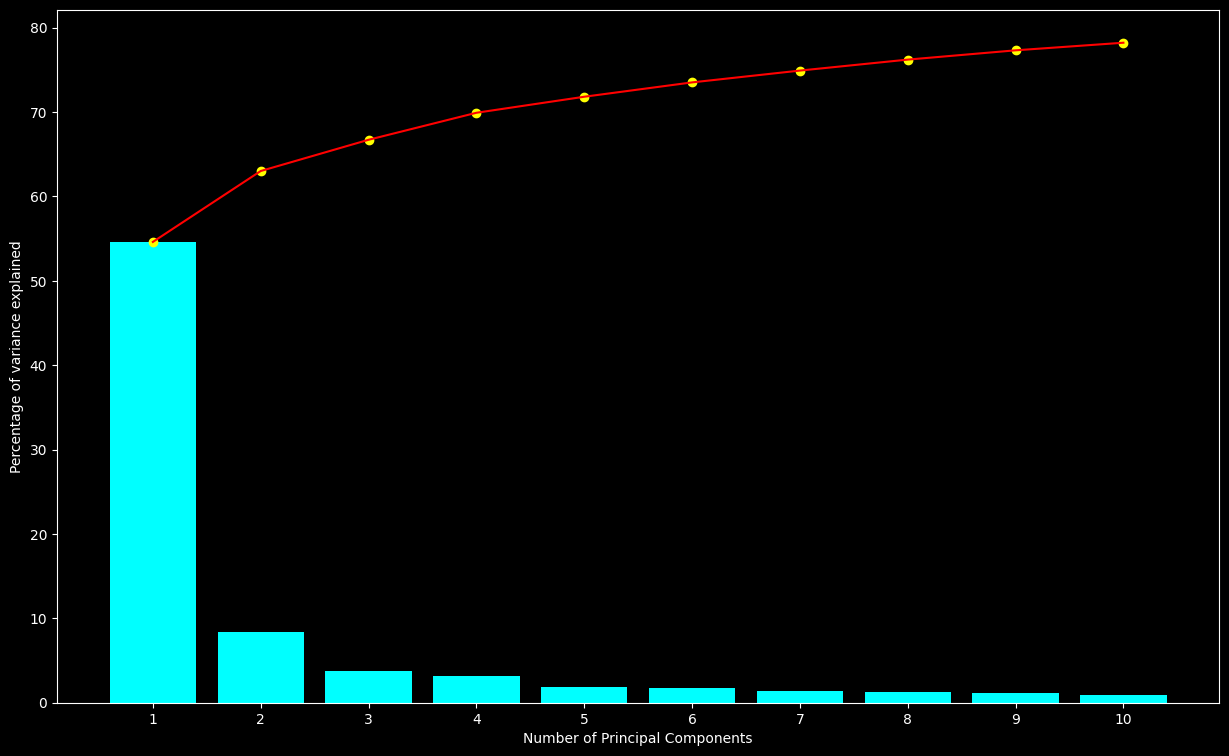

In [10]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [11]:
final_df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "PC3", "State"])
pca_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labels_all)

for sample in pca_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df.PC1.loc[sample]
    dicti["PC2"] = pca_df.PC2.loc[sample]
    dicti["PC3"] = pca_df.PC3.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)

final_df.head()

/tmp/ipython-input-1912756738.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


,StrainID,PC1,PC2,PC3,State
0,hCoV-19/India/763/2020|EPI_ISL_420543|2020-03-03,4.326235,-3.484139,1.786329,Stateless
1,hCoV-19/India/770/2020|EPI_ISL_420545|2020-03-03,4.234399,-3.509996,1.804263,Stateless
2,hCoV-19/India/772/2020|EPI_ISL_420547|2020-03-03,4.184090,-3.754896,1.696688,Stateless
3,hCoV-19/India/773/2020|EPI_ISL_420549|2020-03-03,4.194559,-3.531680,1.895380,Stateless
4,hCoV-19/India/777/2020|EPI_ISL_420551|2020-03-03,4.186462,-3.550434,1.888697,Stateless


In [12]:
import plotly.graph_objs as go
import plotly.express as px

In [13]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

fig.show(renderer = "colab")

In [14]:
from sklearn.manifold import TSNE

# Use these parameters
random_state = 0
n_components = 2
perplexity = 30
n_iter = 10000

####### Enter code below #######

model = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, n_iter=n_iter)
tsne_data = model.fit_transform(np.array(big_matrix))

################################

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [15]:
final_df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
pca_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labels_all)

i = 0
for sample in pca_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

final_df.tail()

/tmp/ipython-input-2683156902.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,-13.493953,19.452469,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,-13.477289,19.912273,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,-13.322492,20.901112,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,-13.722850,21.412252,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,-12.994473,19.036232,Delhi


In [16]:
for_x = final_df.X.tolist()
for_y = final_df.Y.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [17]:
## First we need to get the list of all unique mutations observed in our dataset.

mutations = []
for i in range(len(data)):

    sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

    for j in sample_muts:
        mut = j.strip()[1:][:-1]
        if(len(mut)>=2):
            if(mut not in mutations):
                mutations.append(mut)

print(len(mutations))

1279


In [18]:
samplelist = data["StrainID"].tolist()
df = pd.DataFrame(columns = [*samplelist])
df = df.replace(np.nan,0)

for mutation in mutations:

    dicti = dict(zip(samplelist, np.zeros(len(samplelist), dtype=int)))

    for i in range(len(data)):
        flag=0
        strainid = data["StrainID"][i]
        sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

        for j in sample_muts:
            mut = j.strip()[1:][:-1]
            if(len(mut)>=2):
                if(mut == mutation):
                    flag = 1
                    break

        dicti[strainid]=flag

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)

df = df.T

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278
hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|2020-04-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|2020-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|2020-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|2020-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|2020-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [19]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

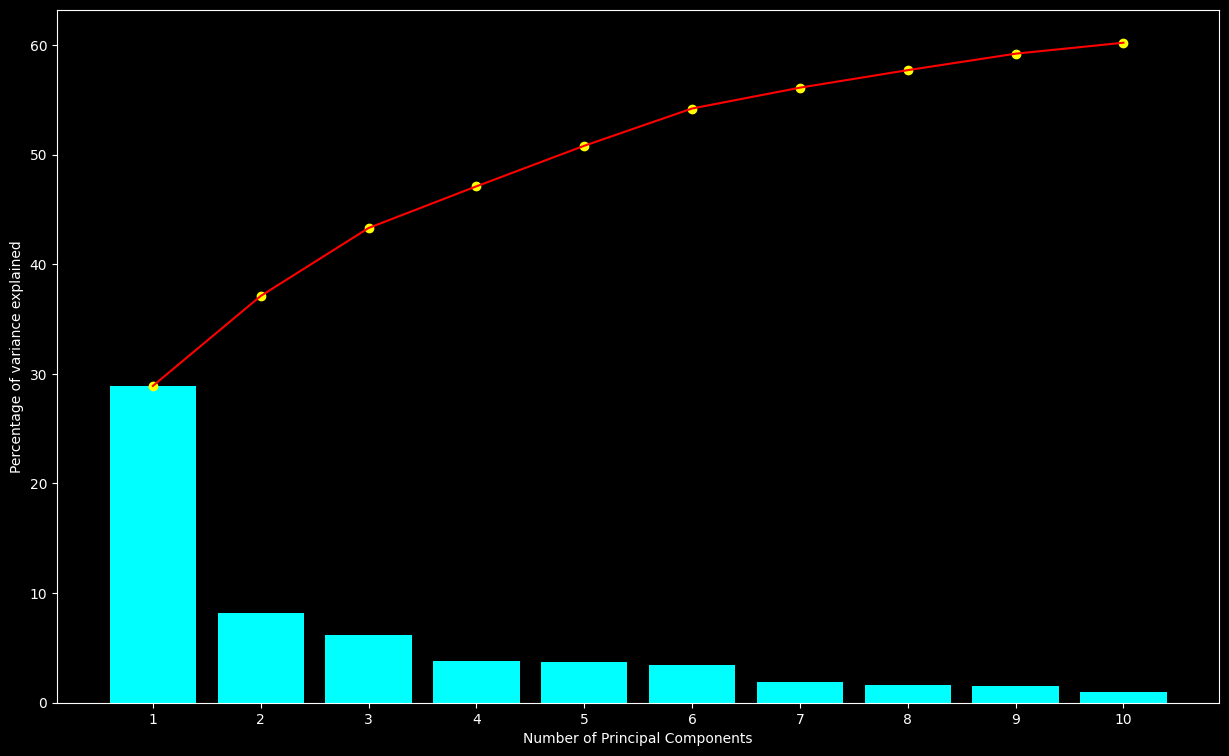

In [20]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [21]:
final_df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "State"])
pca_df = pd.DataFrame(pca_data, index=[*samplelist], columns = labels_all)

for sample in pca_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df.PC1.loc[sample]
    dicti["PC2"] = pca_df.PC2.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)

final_df.tail()

/tmp/ipython-input-1126237342.py:13: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,StrainID,PC1,PC2,State
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,-1.530221,0.079550,Karnataka
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,1.063943,-0.405022,Karnataka
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,1.058232,-0.410670,Karnataka
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,1.057465,-0.409620,Karnataka
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,1.057465,-0.409620,Karnataka


In [22]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, height=600, width=1200,
                 title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')